In [6]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df = pd.read_csv(r'E:\Projects\Student-Mental-Health-Assessment-and-Support-Study\Data\Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


# Data Exploration

In [4]:
class DataExplorer:
    def __init__(self, data):
        self.data = data
        self.shape = data.shape
        self.data_types = data.dtypes
        self.missing_values = data.isnull().sum()
        self.duplicate_rows = data.duplicated().sum()
        
    def summary(self):
        print("Dataset Shape:")
        print(self.shape)
        print("\nData Types:")
        print(self.data_types)
        print("\nMissing Values:")
        print(self.missing_values)
        print("\nDuplicate Rows:")
        print(self.duplicate_rows)

    def summary_statistics(self):
        numeric_data = self.data.select_dtypes(include='number')
        statistics = numeric_data.describe()
        print("\nSummary Statistics for Numerical Columns:")
        print(statistics)
        
    def unique_values(self):
        categorical_data = self.data.select_dtypes(exclude='number')
        unique_values = {}
        for column in categorical_data.columns:
            unique_values[column] = {
                'Unique Values': categorical_data[column].unique(),
                'Value Counts': categorical_data[column].value_counts()
            }
        print("\nUnique Values and Value Counts for Categorical Columns:")
        for column, values in unique_values.items():
            print(f"Column: {column}")
            print(f"Unique Values: {values['Unique Values']}")
            print(f"Value Counts:\n{values['Value Counts']}\n")


# Creating an instance of the DataExplorer class and explore the dataset
data_explorer = DataExplorer(df)
data_explorer.summary()
data_explorer.summary_statistics()
data_explorer.unique_values()

Dataset Shape:
(101, 11)

Data Types:
Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

Missing Values:
Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status 

# Data Visualization 

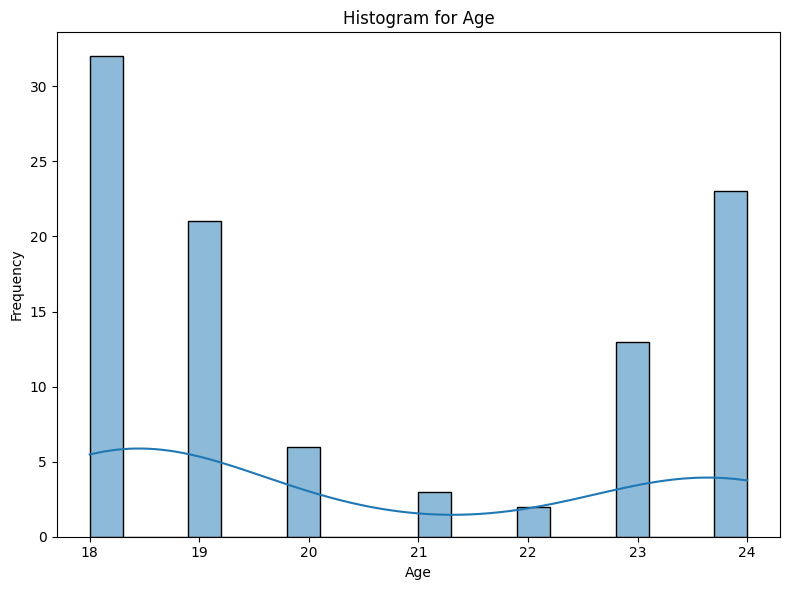

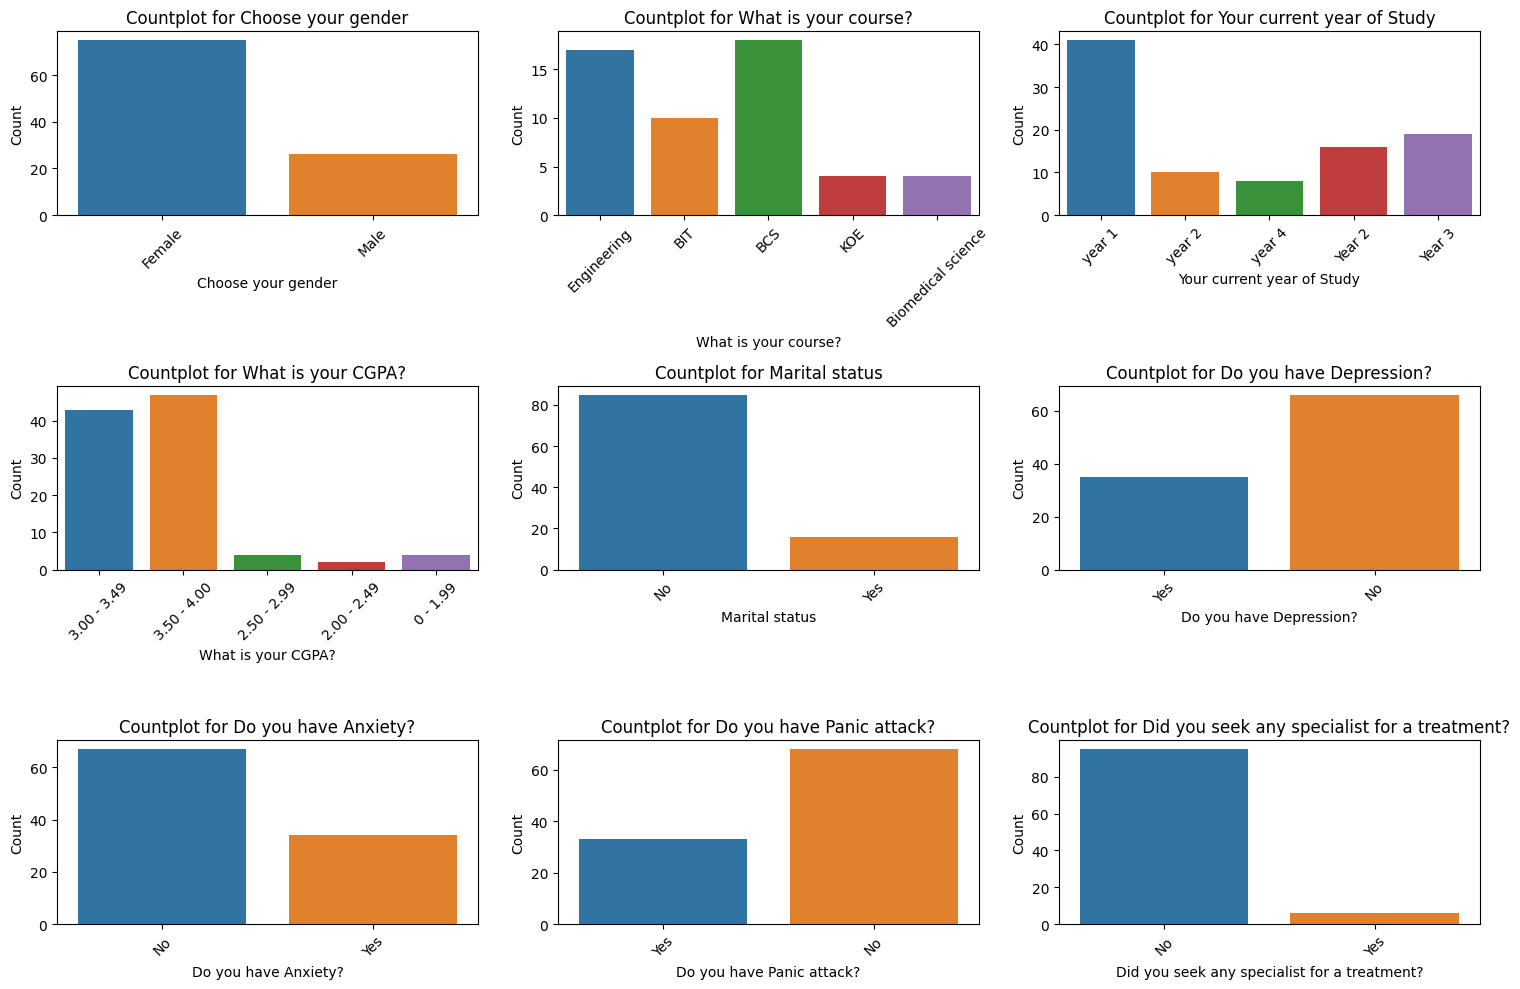

In [5]:
class DataVisualizer:
    def __init__(self, data):
        self.data = data.drop(columns=['Timestamp'])  # Drop timestamp for visualization
        
    def plot_histograms(self):
        numeric_data = self.data.select_dtypes(include='number')
        numeric_columns = numeric_data.columns
        
        for column in numeric_columns:
            plt.figure(figsize=(8, 6))
            sns.histplot(self.data[column], bins=20, kde=True)
            plt.title(f'Histogram for {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()

    def plot_categorical_counts(self, top_n=5):
        categorical_data = self.data.select_dtypes(exclude='number')
        num_columns = len(categorical_data.columns)
        num_plots_per_row = 3
        num_rows = -(-num_columns // num_plots_per_row)  # Ceiling division to determine the number of rows

        fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 10))

        for i, column in enumerate(categorical_data.columns):
            ax = axes[i // num_plots_per_row, i % num_plots_per_row]
            top_categories = self.data[column].value_counts().nlargest(top_n).index
            sns.countplot(x=column, data=self.data[self.data[column].isin(top_categories)], ax=ax)
            ax.set_title(f'Countplot for {column}')
            ax.set_xlabel(column)
            ax.set_ylabel('Count')
            ax.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

# Example usage
visualizer = DataVisualizer(df)
visualizer.plot_histograms()
visualizer.plot_categorical_counts(top_n=5)

In [7]:
class DataProcessor:
    def __init__(self, data):
        self.data = data.copy()

    def drop_columns(self, columns):
        # Drop specified columns from the DataFrame
        self.data = self.data.drop(columns=columns, errors='ignore')

    def handle_missing_data(self, strategy='mean'):
        # Handle missing data using specified strategy (default: mean) for numeric columns
        numeric_columns = self.data.select_dtypes(include='number').columns
        imputer = SimpleImputer(strategy=strategy)
        self.data[numeric_columns] = imputer.fit_transform(self.data[numeric_columns])

    def handle_outliers(self, columns=None, z_threshold=3):
        # Handle outliers using Z-score
        if columns is None:
            columns = self.data.select_dtypes(include='number').columns

        for column in columns:
            z_scores = (self.data[column] - self.data[column].mean()) / self.data[column].std()
            self.data = self.data[(z_scores.abs() < z_threshold) | self.data[column].isna()]

    def encode_categorical_variables(self):
        # Encode categorical variables with numerical labels
        label_encoder = LabelEncoder()

        # Exclude timestamp column from encoding
        categorical_columns = self.data.select_dtypes(exclude=['number', 'datetime']).columns
        for column in categorical_columns:
            self.data[column] = label_encoder.fit_transform(self.data[column].astype(str))

    def normalize_numerical_features(self):
        # Normalize only the 'Age' column using StandardScaler
        numerical_columns = self.data.select_dtypes(include='number').columns
        scaler = StandardScaler()
        self.data['Age'] = scaler.fit_transform(self.data[['Age']])

# Example usage
# Assuming df is your DataFrame
processor = DataProcessor(df)
processor.drop_columns(columns=['Timestamp'])
processor.handle_missing_data()
processor.handle_outliers()
processor.encode_categorical_variables()
processor.normalize_numerical_features()

# Access the preprocessed data
preprocessed_data = processor.data
preprocessed_data

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,0,-1.023694,17,3,3,0,1,0,1,0
1,1,0.190172,25,4,3,0,0,1,0,0
2,1,-0.619072,4,0,3,0,1,1,1,0
3,0,0.594795,33,5,3,1,1,0,0,0
4,1,0.999417,37,6,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
96,0,0.190172,2,3,4,0,0,1,0,0
97,1,-1.023694,17,1,3,0,1,1,0,0
98,0,-0.619072,38,2,4,1,1,0,1,0
99,0,0.999417,39,6,4,0,0,0,0,0
